# Week 11 Lecture Estimations
The first topic for Estimation is Percentiles.  When determine estimates of parameters.  A parameter is the actual value of a population.  We will start with learning how to determine the percentiles of a population.
Let's run our first code cell.

In [1]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [5]:
# We will use the scores_by_section.csv file to do our calculations
scores_and_sections = Table.read_table('scores_by_section.csv')
scores_and_sections

Section | Midterm
1       | 22
2       | 12
2       | 23
2       | 14
1       | 20
3       | 25
4       | 19
1       | 24
5       | 8
6       | 14
... (349 rows omitted)

# the percentile function
You maybe interested in 50% percentile of the Midterm grades.  To find that information you use the percentile function.  Suppose I am interested in the middle point for the Midterm grades.
```
percentile(X, array)
```
Where X is the percentile (i.e. 70) and array is the values you want to find the percentile


In [6]:
# Find the median or 50% of score_and_sections
percentile(50, scores_and_sections.column(1))

16

In [7]:
# Find the 25th percentile of scores_and_sections
percentile(25, scores_and_sections.column(1))

11

In [8]:
# Find the 75th percentile of scores_and_sections
percentile(75, scores_and_sections.column(1))

20

In [19]:
# Find the upper 10 percent of the scores
percentile(90, scores_and_sections.column(1))

23

In [10]:
# minimum and maximum scores
scores_and_sections.column(1).min(), scores_and_sections.column(1).max()

(0, 25)

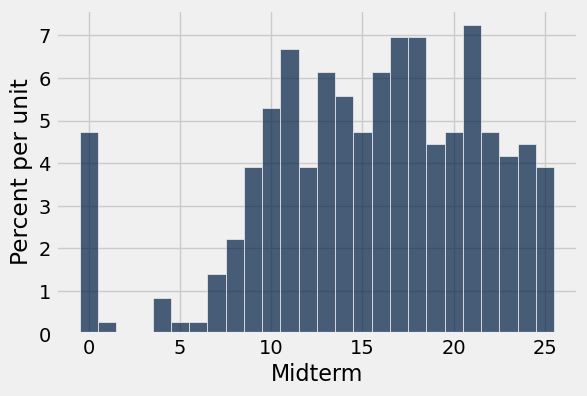

In [11]:
# set the bin width to half a set below the minimum value and add 0.6 to the 
# maximum value.  Draw a histogram based on the Midterm column

bin_width = np.arange(-0.5, 25.6, 1)
scores_and_sections.select('Midterm').hist(bins=bin_width)

# Bootstrap - 
Random sample from original population by method called resampling.  

In [2]:
# create a table from City of San Francisco Compensation
sf2019 = Table.read_table('san_francisco_2019.csv')
sf2019

Organization Group | Department      | Job Family                    | Job                            | Salary | Overtime | Benefits | Total Compensation
Public Protection  | Adult Probation | Information Systems           | IS Trainer-Journey             | 91332  | 0        | 40059    | 131391
Public Protection  | Adult Probation | Information Systems           | IS Engineer-Assistant          | 123241 | 0        | 49279    | 172520
Public Protection  | Adult Probation | Information Systems           | IS Business Analyst-Senior     | 115715 | 0        | 46752    | 162468
Public Protection  | Adult Probation | Information Systems           | IS Business Analyst-Principal  | 159394 | 0        | 57312    | 216706
Public Protection  | Adult Probation | Information Systems           | IS Programmer Analyst          | 70035  | 0        | 28671    | 98706
Public Protection  | Adult Probation | Information Systems           | IS Project Director            | 175742 | 0        | 60830    | 236572
Public Protection  | Adult Probation | Information Systems           | IT Operations Support Admin IV | 123840 | 0        | 49429    | 173269
Public Protection  | Adult Probation | Payroll, Billing & Accounting | Accountant III                 | 111816 | 0        | 46319    | 158135
Public Protection  | Adult Probation | Budget, Admn & Stats Analysis | Statistician                   | 87725  | 0        | 38899    | 126624
Public Protection  | Adult Probation | Budget, Admn & Stats Analysis | Senior Administrative Analyst  | 116192 | 0        | 47651    | 163843
... (44515 rows omitted)

In [3]:
sf2019.where('Job', are.equal_to('Mayor'))

Organization Group               | Department | Job Family                    | Job   | Salary | Overtime | Benefits | Total Compensation
General Administration & Finance | Mayor      | Administrative & Mgmt (Unrep) | Mayor | 342974 | 0        | 98012    | 440987

In [4]:
sf2019.sort('Total Compensation')

Organization Group                      | Department         | Job Family                    | Job                            | Salary | Overtime | Benefits | Total Compensation
Public Protection                       | Adult Probation    | Probation & Parole            | Deputy Probation Officer       | 0      | 0        | 0        | 0
Public Protection                       | Fire Department    | Clerical, Secretarial & Steno | Senior Clerk Typist            | 0      | 0        | 0        | 0
Public Protection                       | Juvenile Court     | Correction & Detention        | Counselor, Juvenile Hall PERS  | 0      | 0        | 0        | 0
Public Protection                       | Police             | Clerical, Secretarial & Steno | Clerk Typist                   | 0      | 0        | 0        | 0
Public Protection                       | Sheriff            | Correction & Detention        | Deputy Sheriff                 | 0      | 0        | 0        | 0
Public Works, Transportation & Commerce | Airport Commission | Sub-Professional Engineering  | StdntDsgn Train2/Arch/Eng/Plng | 0      | 0        | 0        | 0
Public Works, Transportation & Commerce | Airport Commission | Clerical, Secretarial & Steno | Executive Secretary 1          | 0      | 0        | 0        | 0
Public Works, Transportation & Commerce | Airport Commission | Payroll, Billing & Accounting | Senior Account Clerk           | 0      | 0        | 0        | 0
Public Works, Transportation & Commerce | Airport Commission | Housekeeping & Laundry        | Custodian                      | 0      | 0        | 0        | 0
Public Works, Transportation & Commerce | Airport Commission | Housekeeping & Laundry        | Custodian                      | 0      | 0        | 0        | 0
... (44515 rows omitted)

In [5]:
# Look at salaries $15*20*50 = $15,600
sf2019 = sf2019.where('Total Compensation', are.above(15600))

In [6]:
# Number of rows in new table
sf2019.num_rows

37657

In [7]:
# Population and Parameters
sf2019.column(7).min()

15618.0

In [8]:
sf2019.column(7).max()

724031.0

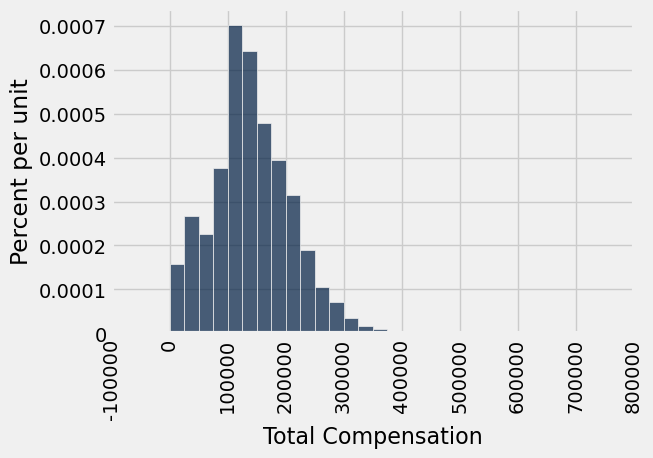

In [9]:
bin_widths = np.arange(0, 726000, 25000)
sf2019.select('Total Compensation').hist(bins = bin_widths)

In [10]:
# sort Total Compensation from descending and show 2 record
sf2019.sort('Total Compensation', descending=True).show(2)

In [11]:
# Calculate the median Compensation
pop_median = percentile(50, sf2019.column('Total Compensation'))
pop_median

134698.0

# Estimate from a Random Sample
Use the sample method to take a sample from the original population
```
table.sample(n, with_replacement=False)
```
Take a sample of size n, without replacing the records preventing the duplicate records.


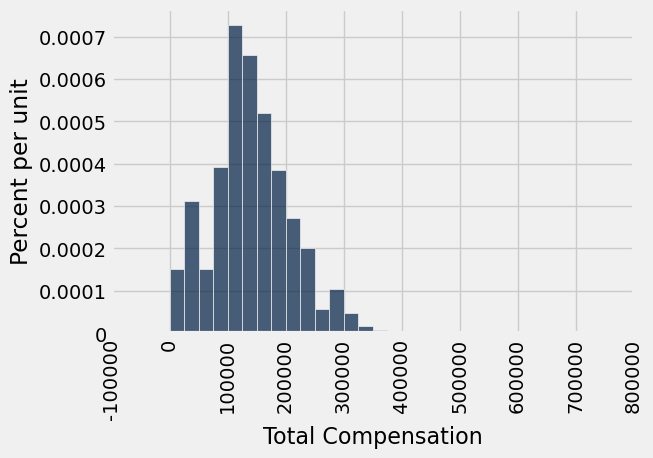

In [13]:
# take a random sample of 500 records put in variable our_sample and create a
# histogram

our_sample = sf2019.sample(500, with_replacement=False)
our_sample.select('Total Compensation').hist(bins= bin_widths)


In [14]:
# compute the median from the Sample
est_median = percentile(50, our_sample.column('Total Compensation'))
est_median

136889.0

# Bootstrap: Resampling from the Sample
Steps in the process
- **Treat the original sample as if it were the populaiton.**
- **Draw from the sample, at random with replacement, the same number of times as the orignal sample size.**
By drawing with replacement, we create the possibility for the new samples to be different from the original, because some employees might be drawn more than once and others not at all.


In [15]:
# Sample method draws records from the table with replacement so duplicate records are possible
resample_1 = our_sample.sample()


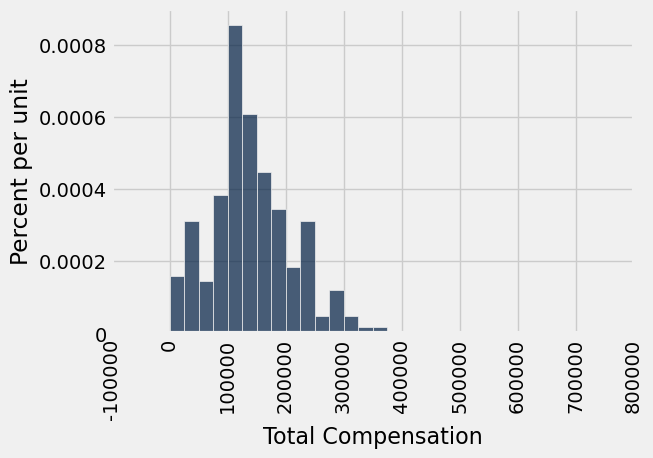

In [16]:
resample_1.select('Total Compensation').hist(bins=bin_widths)

In [17]:
resample_1 = our_sample.sample()
resampled_median_1 = percentile(50, resample_1.column('Total Compensation'))
resampled_median_1

132569.0

In [18]:
resample_2 = our_sample.sample()
resampled_median_2 = percentile(50, resample_2.column('Total Compensation'))
resampled_median_2

135297.0

In [19]:
# Create a function to resample from the sample and compute the median
def one_bootstrap_median():
    resampled_table = our_sample.sample()
    bootstrapped_median = percentile(50, resampled_table.column('Total Compensation'))
    return bootstrapped_median
    

In [20]:
one_bootstrap_median()

141696.0

In [23]:
# Repeat the process 5000 times noting the median in an array called bstrap_medians
num_repetitions = 5000
bstrap_medians = make_array()
for i in np.arange(num_repetitions):
    bstrap_medians = np.append(bstrap_medians, one_bootstrap_median())
    

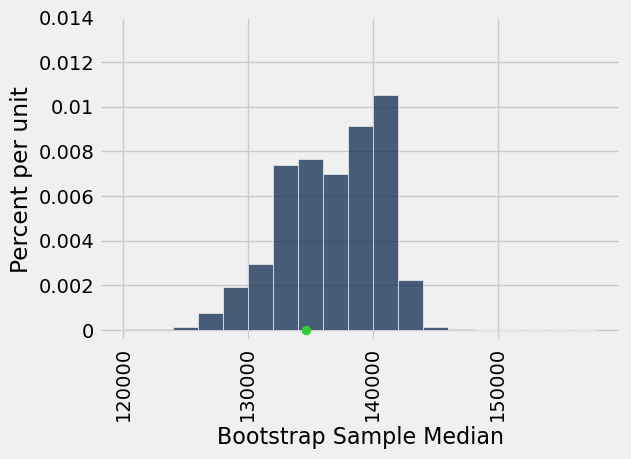

In [22]:
# Create Table with median and create the histogram with population parameter
resampled_medians = Table().with_column('Bootstrap Sample Median', bstrap_medians)
median_bins=np.arange(120000, 160000, 2000)
resampled_medians.hist(bins = median_bins)

# Plotting parameters; you can ignore this code
parameter_green = '#32CD32'
plots.ylim(-0.000005, 0.00014)
plots.scatter(pop_median, 0, color=parameter_green, s=40, zorder=2);

In [24]:
# Do the Estimats Capture the Parameter?
left = percentile(2.5, bstrap_medians)
left

128809.0

In [25]:
right = percentile(97.5, bstrap_medians)
right

142647.0

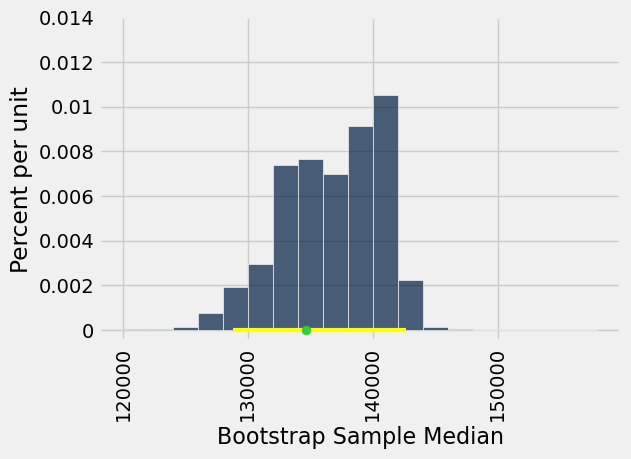

In [26]:
# Range of values to sample medians
resampled_medians.hist(bins = median_bins)

# Plotting parameters; you can ignore this code
plots.ylim(-0.000005, 0.00014)
plots.plot([left, right], [0, 0], color='yellow', lw=3, zorder=1)
plots.scatter(pop_median, 0, color=parameter_green, s=40, zorder=2);

# Placement of Population Parameter
To see how many intervals contain the population parameter


In [59]:
# Create a function to bootstrap sample repeat process and find medians in resample process.
def bootstrap_median(original_sample, num_repetitions):
    medians = make_array()
    for i in np.arange(num_repetitions):
        new_bstrap_sample = original_sample.sample()
        new_bstrap_median = percentile(50, new_bstrap_sample.column('Total Compensation'))
        medians = np.append(medians, new_bstrap_median)
    return medians

In [60]:
# Repeat 100 times
# THE BIG SIMULATION: This one takes several minutes.

# Generate 100 intervals and put the endpoints in the table intervals

left_ends = make_array()
right_ends = make_array()

for i in np.arange(100):
    original_sample = sf2019.sample(500, with_replacement=False)
    medians = bootstrap_median(original_sample, 5000)
    left_ends = np.append(left_ends, percentile(2.5, medians))
    right_ends = np.append(right_ends, percentile(97.5, medians))

intervals = Table().with_columns(
    'Left', left_ends,
    'Right', right_ends
)    

KeyboardInterrupt: 

In [61]:
intervals

NameError: name 'intervals' is not defined

In [62]:
# Display population median
pop_median

134698.0

In [ ]:
# of ranges where pop_median is contained in the range
intervals.where(
    'Left', are.below(pop_median)).where(
    'Right', are.above(pop_median)).num_rows

# Confidence Intervals
Confidence interval range where the population parameter is in the interval X% of the time.

In [64]:
# Read in baby.csv
births = Table.read_table('baby.csv')

In [65]:
births.show(3)

# Estimate the birth weights
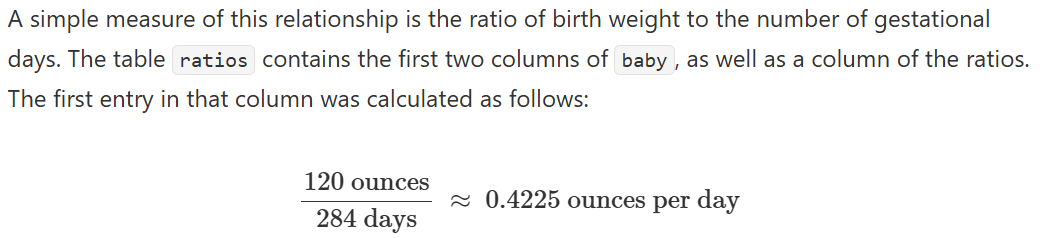

In [66]:
ratios = births.select('Birth Weight', 'Gestational Days').with_columns(
    'Ratio BW:GD', births.column('Birth Weight')/births.column('Gestational Days')
)

In [67]:
ratios

Birth Weight | Gestational Days | Ratio BW:GD
120          | 284              | 0.422535
113          | 282              | 0.400709
128          | 279              | 0.458781
108          | 282              | 0.382979
136          | 286              | 0.475524
138          | 244              | 0.565574
132          | 245              | 0.538776
120          | 289              | 0.415225
143          | 299              | 0.478261
140          | 351              | 0.39886
... (1164 rows omitted)

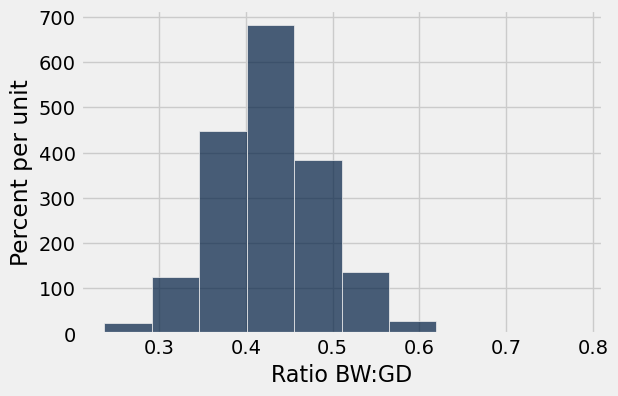

In [68]:
ratios.select('Ratio BW:GD').hist()

# Constructing a Bootstrap Confidence Interval
Define a function that takes the bootstrap sample of the Ratios


In [69]:
def one_bootstrap_median():
    resample = ratios.sample()
    return percentile(50, resample.column('Ratio BW:GD'))

In [70]:
# run the function
one_bootstrap_median()

0.4290657439446367

In [71]:
# Generate medians from 5000 bootstrap samples
num_repetitions = 5000
bstrap_medians = make_array()
for i in np.arange(num_repetitions):
    bstrap_medians = np.append(bstrap_medians, one_bootstrap_median())

In [72]:
# Get the endpoints of the 95% confidence interval
left = percentile(2.5, bstrap_medians)
right = percentile(97.5, bstrap_medians)

make_array(left, right)

array([ 0.42545455,  0.43272727])

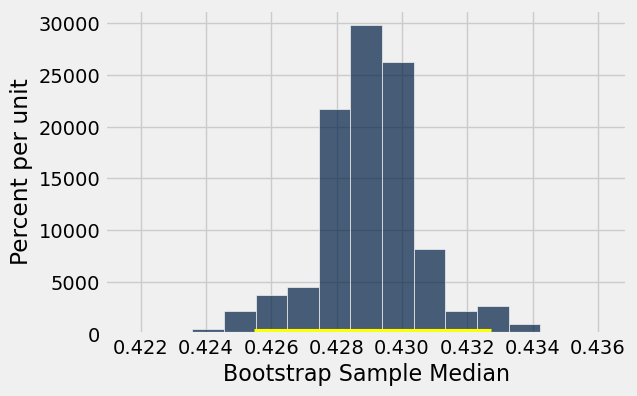

In [73]:
resampled_medians = Table().with_columns(
    'Bootstrap Sample Median', bstrap_medians
)
resampled_medians.hist(bins=15)
plots.plot([left, right], [0, 0], color='yellow', lw=8);

# Estimating a Population Average


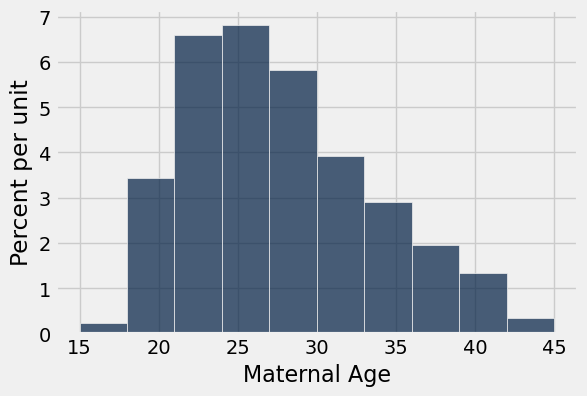

In [74]:
births.select('Maternal Age').hist()

In [75]:
np.average(births.column('Maternal Age'))

27.228279386712096

In [76]:
def one_bootstrap_mean():
    resample = births.sample()
    return np.average(resample.column('Maternal Age'))

In [77]:
# Generate means from 5000 bootstrap samples
num_repetitions = 5000
bstrap_means = make_array()
for i in np.arange(num_repetitions):
    bstrap_means = np.append(bstrap_means, one_bootstrap_mean())

In [78]:
# Get the endpoints of the 95% confidence interval
left = percentile(2.5, bstrap_means)
right = percentile(97.5, bstrap_means)

make_array(left, right)

array([ 26.90204429,  27.55877342])

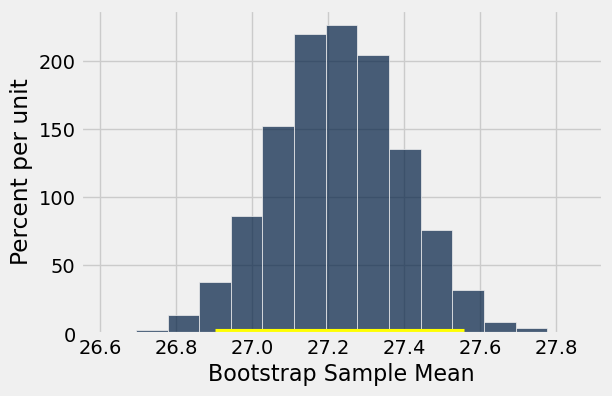

In [79]:
resampled_means = Table().with_columns(
    'Bootstrap Sample Mean', bstrap_means
)
resampled_means.hist(bins=15)
plots.plot([left, right], [0, 0], color='yellow', lw=8);

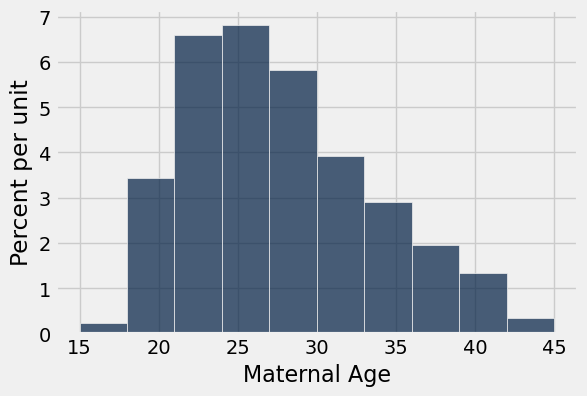

In [80]:
births.select('Maternal Age').hist()

In [81]:
# 80% Confidence Interval
left_80 = percentile(10, bstrap_means)
right_80 = percentile(90, bstrap_means)
make_array(left_80, right_80)

array([ 27.01192504,  27.44463373])

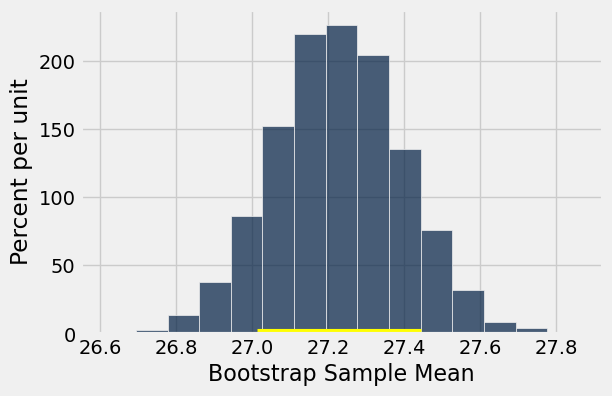

In [82]:
resampled_means.hist(bins=15)
plots.plot([left_80, right_80], [0, 0], color='yellow', lw=8);

# Estimating a Population Proportion


In [83]:
births.where('Maternal Smoker', are.equal_to(True)).num_rows / births.num_rows

0.3909710391822828

In [84]:
smoking = births.column('Maternal Smoker')
np.count_nonzero(smoking) / len(smoking)

0.39097103918228282

In [85]:
def one_bootstrap_proportion():
    resample = births.sample()
    smoking = resample.column('Maternal Smoker')
    return np.count_nonzero(smoking) / len(smoking)

In [86]:
# Generate proportions from 5000 bootstrap samples
bstrap_proportions = make_array()
num_repetitions = 5000
for i in np.arange(num_repetitions):
    bstrap_proportions = np.append(bstrap_proportions, one_bootstrap_proportion())

In [87]:
# Get the endpoints of the 95% confidence interval
left = percentile(2.5, bstrap_proportions)
right = percentile(97.5, bstrap_proportions)

make_array(left, right)

array([ 0.36201022,  0.41908007])

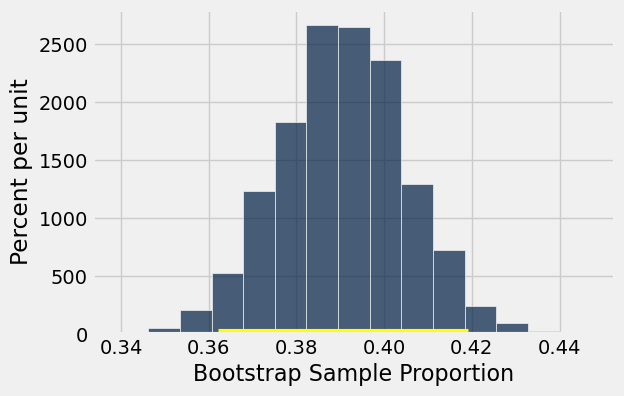

In [88]:
resampled_proportions = Table().with_columns(
    'Bootstrap Sample Proportion', bstrap_proportions
)
resampled_proportions.hist(bins=15)
plots.plot([left, right], [0, 0], color='yellow', lw=8);

# Care in Using the Bootstrap Percentile Method
- Start with a large random sample
- To approximate the probability distribution of a statistic by replicate the resampling procedure
- The bootstrap percentile method works well for estimating the population median or mean based ona large randomsample.

# Using Confidence Intervals


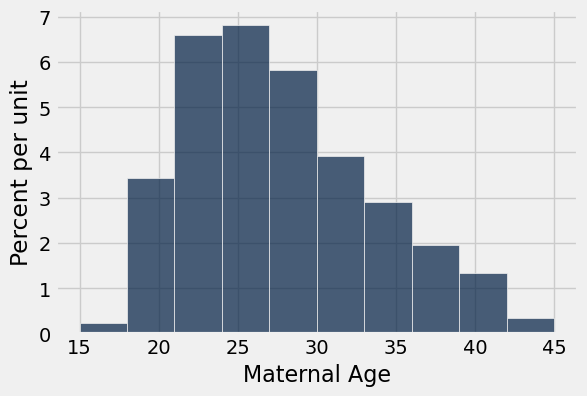

In [90]:
births.select('Maternal Age').hist()

# Using a Confidence Interval to Test Hypotheses
95% confidence interval is (26.9, 27.6)  To test the hypotheses.

**Null Hypothesis:** The average age in the population is 30 years.<br>
**Alternative Hypothesis:** The average age in the population is no 30 years.<br>
<br>
Using the 5% cutoff for the p-value, you reject the null hypothesis.

In [ ]:
# Comparing Basline and Post Treatment Sccores


In [92]:
hodgkins = Table.read_table('hodgkins.csv')

In [94]:
hodgkins.show(3)

In [104]:
hodgkins = hodgkins.with_columns(
    'drop', hodgkins.column('base') - hodgkins.column('month15')
)

In [105]:
hodgkins

height | rad  | chemo | base   | month15 | drop
164    | 679  | 180   | 160.57 | 87.77   | 72.8
168    | 311  | 180   | 98.24  | 67.62   | 30.62
173    | 388  | 239   | 129.04 | 133.33  | -4.29
157    | 370  | 168   | 85.41  | 81.28   | 4.13
160    | 468  | 151   | 67.94  | 79.26   | -11.32
170    | 341  | 96    | 150.51 | 80.97   | 69.54
163    | 453  | 134   | 129.88 | 69.24   | 60.64
175    | 529  | 264   | 87.45  | 56.48   | 30.97
185    | 392  | 240   | 149.84 | 106.99  | 42.85
178    | 479  | 216   | 92.24  | 73.43   | 18.81
... (12 rows omitted)

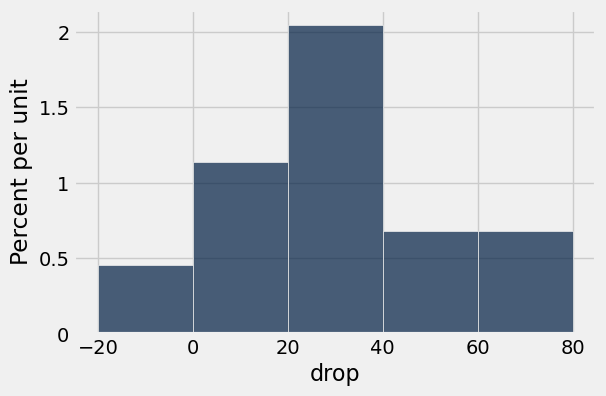

In [106]:
hodgkins.select('drop').hist(bins=np.arange(-20, 81, 20))

In [107]:
np.average(hodgkins.column('drop'))

28.615909090909096

**Null Hypothesis:** In the population, the average drop is 0.<br>
**Alternative Hypothesis:** In the population, the average drop is not 0.<br>
Use a 1% cutoff for p-value, let's construct an approximate 99% confidence interval for the average drop in the population.

In [108]:
def one_bootstrap_mean():
    resample = hodgkins.sample()
    return np.average(resample.column('drop'))

In [109]:
# Generate 10,000 bootstrap means
num_repetitions = 10000
bstrap_means = make_array()
for i in np.arange(num_repetitions):
    bstrap_means = np.append(bstrap_means, one_bootstrap_mean())

In [110]:
# Get the endpoints of the 99% confidence interval
left = percentile(0.5, bstrap_means)
right = percentile(99.5, bstrap_means)

make_array(left, right)

array([ 16.92227273,  40.95409091])

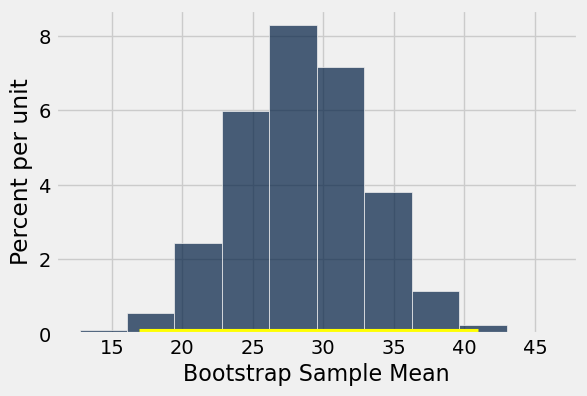

In [111]:
resampled_means = Table().with_columns(
    'Bootstrap Sample Mean', bstrap_means
)
resampled_means.hist()
plots.plot([left, right], [0, 0], color='yellow', lw=8);

# Conclusion
The interval does not contain 0.  Therefore, we reject Ho.

<br><br>
**A note on accurancy:** Our confidence interval is quite wide, for two main reasons:
- The confidence level is high (99%).
- The sample size is relatively small compared to the other sample sizes we took.